In [43]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Flatten,MaxPooling2D,Dense,Conv2D,Dropout
from tensorflow.keras.preprocessing import image,image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from time import time
import cv2


In [ ]:
images =[ r'D:\Data Analytics for Business\Keras learning\COVID_19_xray\COVID',r'D:\Data Analytics for Business\Keras learning\COVID_19_xray\NORMAL']

In [ ]:
# BLUR THE IMAGES of COVID + PHOTOS
for img in os.listdir(images[0]):
    if 'blur' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        im = cv2.GaussianBlur(a,(5,5),4)
        cv2.imwrite(f'{images[0]}\{img[:-4]}_blur.jpg',im)
    # ROTATE THE IMAGE of COVID + PHOTOS
    if 'rotate' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        m= cv2.getRotationMatrix2D(((224-1)/2.,(224-1)/2.),90,1)
        im = cv2.warpAffine(a,m,(224,224))
        cv2.imwrite(f'{images[0]}\{img[:-4]}_rotate90.jpg',im)

# ***************************************************************************
# BLUR THE IMAGES of COVID - PHOTOS
for img in os.listdir(images[1]):
    if 'blur' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        im = cv2.GaussianBlur(a,(5,5),4)
        cv2.imwrite(f'{images[0]}\{img[:-4]}_blur.jpg',im)

# ROTATE THE IMAGE of COVID - PHOTOS
    if 'rotate' not in img:
        a = cv2.imread(f'{images[0]}\{img}')
        m= cv2.getRotationMatrix2D(((224-1)/2.,(224-1)/2.),90,1)
        im = cv2.warpAffine(a,m,(224,224))
        cv2.imwrite(f'{images[0]}\{img[:-4]}_rotate90.jpg',im)



In [36]:
train_ds = image_dataset_from_directory(directory='D:\Data Analytics for Business\Keras learning\COVID 19 xray',subset='training',validation_split=0.3,image_size=(224,224),batch_size=16,seed=11,color_mode='grayscale')

Found 324 files belonging to 3 classes.
Using 227 files for training.


In [37]:
val_ds = image_dataset_from_directory(directory='D:\Data Analytics for Business\Keras learning\COVID 19 xray',subset='validation',image_size=(224,224),batch_size=16,validation_split=0.3,seed=12,color_mode='grayscale')

Found 324 files belonging to 3 classes.
Using 97 files for validation.


In [6]:
classes = ['covid+','covid-']

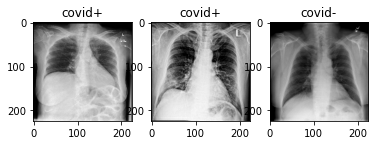

In [9]:
for im,lab in train_ds:
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(im[i].numpy().astype('uint8'))
        plt.title(classes[lab[i].numpy()])


In [44]:
model = Sequential()
model.add(Rescaling(1./255,input_shape=(224,224,1)))
model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),loss=SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [45]:
name = int(time())

In [46]:
chkpt = ModelCheckpoint(filepath=r'D:\Data Analytics for Business\Keras learning\COVID 19 xray\best_model.hdf5',monitor='val_accuracy')
tenboard = TensorBoard(log_dir=f'logs/{name}')

In [47]:
history = model.fit(train_ds,validation_data=(val_ds),epochs=50,callbacks=[tenboard,chkpt])

Epoch 1/50
15/15 [==============================] - 4s 224ms/step - loss: 0.8898 - accuracy: 0.5727 - val_loss: 0.6041 - val_accuracy: 0.6701
Epoch 2/50
15/15 [==============================] - 2s 147ms/step - loss: 0.4985 - accuracy: 0.7445 - val_loss: 0.4420 - val_accuracy: 0.8041
Epoch 3/50
15/15 [==============================] - 2s 155ms/step - loss: 0.3537 - accuracy: 0.8590 - val_loss: 0.3913 - val_accuracy: 0.8454
Epoch 4/50
15/15 [==============================] - 2s 138ms/step - loss: 0.3216 - accuracy: 0.8546 - val_loss: 0.3734 - val_accuracy: 0.8660
Epoch 5/50
15/15 [==============================] - 2s 162ms/step - loss: 0.2596 - accuracy: 0.8987 - val_loss: 0.3135 - val_accuracy: 0.8763
Epoch 6/50
15/15 [==============================] - 2s 129ms/step - loss: 0.1827 - accuracy: 0.9339 - val_loss: 0.3188 - val_accuracy: 0.8763
Epoch 7/50
15/15 [==============================] - 2s 139ms/step - loss: 0.1435 - accuracy: 0.9648 - val_loss: 0.2560 - val_accuracy: 0.8763
Epoch 

In [54]:
# Function to Predict the Image

def pred_func(file):
    try_im = image.load_img(file,target_size=(224,224,1))
    try_im = image.img_to_array(try_im)
    try_im = try_im.reshape(-1,224,224,1)
    return classes[np.argmax(model.predict(try_im))]
    

In [56]:
file=r'D:\Data Analytics for Business\Keras learning\COVID 19 xray\NORMAL\normal_4.jpg'
pred_func(file)

'covid+'

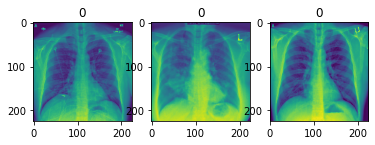

In [57]:
for im,lab in train_ds:
    for i in range(3):
        plt.subplot(2,3,i+1)
        plt.imshow(im[i].numpy().astype('uint8'))
        plt.title(lab[i].numpy())